In [5]:
# 导入 fetch_openml 函数用于加载数据集
from sklearn.datasets import fetch_openml
import numpy as np
# 使用 fetch_openml 函数加载 MNIST 手写数字数据集，版本号为1
mnist = fetch_openml('mnist_784', version=1)

# 从数据集中获取特征矩阵 X 和目标向量 y
X, y = mnist['data'], mnist['target']

# 划分数据集为训练集和测试集
# 前6000个样本用于训练，剩余的用于测试
X_train, X_test = X[:600], X[-60:]
# 将目标向量 y 转换为无符号整数类型（uint8）
y_train, y_test = y[:600].astype(np.uint8), y[-60:].astype(np.uint8)


g:\anaconda\envs\sksklearn\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


# knn
k临近
从最近邻算法延伸而来
step.1---初始化距离为最大值
step.2---计算未知样本和每个训练样本的距离dist
step.3---得到目前K个最临近样本中的最大距离maxdist
step.4---如果dist小于maxdist，则将该训练样本作为K-最近	邻样本
step.5---重复步骤2、3、4，直到未知样本和所有训练样本的	距离都算完
step.6---统计K个最近邻样本中每个类别出现的次数
step.7---选择出现频率最大的类别作为未知样本的类别


由上面的例子可见：该算法在分类时有个重要的不足是，当样本不平衡时，即：一个类的样本容量很大，而其他类样本数量很小时，很有可能导致当输入一个未知样本时，该样本的K个邻居中大数量类的样本占多数。 但是这类样本并不接近目标样本，而数量小的这类样本很靠近目标样本。这个时候，我们有理由认为该位置样本属于数量小的样本所属的一类，但是，KNN却不关心这个问题，它只关心哪类样本的数量最多，而不去把距离远近考虑在内，因此，我们可以采用权值的方法来改进。和该样本距离小的邻居权值大，和该样本距离大的邻居权值则相对较小，由此，将距离远近的因素也考虑在内，避免因一个样本过大导致误判的情况  
压缩临近算法

In [6]:
from sklearn.neighbors import KNeighborsClassifier
#定义随KNN分类器  参数N为邻居数目
knn = KNeighborsClassifier(n_neighbors=10)
#训练过程  X为特征向量，y为标签数据/向量
knn.fit(X, y)


KNeighborsClassifier(n_neighbors=10)

# 贝叶斯分类器

In [7]:
from sklearn.naive_bayes import GaussianNB
#定义高斯分类器类
gnb = GaussianNB()
#训练过程
gnb.fit(X, y)


GaussianNB()

In [8]:
# 导入 StandardScaler 类
from sklearn.preprocessing import StandardScaler

# 创建 StandardScaler 的实例
scaler = StandardScaler()

# 使用 StandardScaler 对训练集特征数据进行标准化处理
# 注意：标准化要求特征数据是浮点型，所以使用 astype(np.float64) 将数据类型转换为浮点型
X_train_scaler = scaler.fit_transform(X_train.astype(np.float64))


<function matplotlib.pyplot.show(close=None, block=None)>

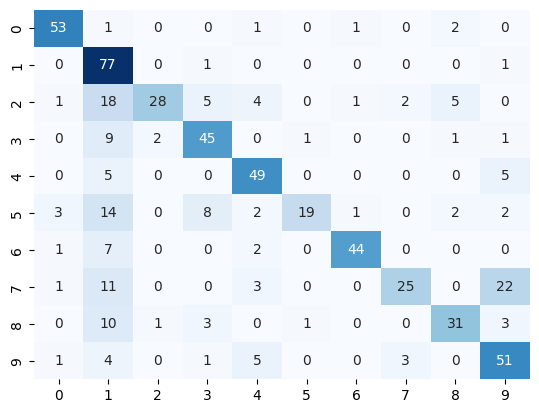

In [9]:
# 导入所需库
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# 使用交叉验证进行预测，通常需要有一个已经定义好的分类器 sgd_clf 和经过标准化处理的训练集 X_train_scaler 以及对应的标签 y_train
y_train_pred = cross_val_predict(knn, X_train_scaler, y_train, cv=3)

# 计算混淆矩阵
confusion_matrix = confusion_matrix(y_train, y_train_pred)


sns.heatmap(confusion_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)

plt.show
# 画了一个混淆矩阵 都在对角线所以效果好


# 神经网络
sklearn实现的神经网络
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network
sklearn.neural_network 模块包含基于神经网络的模型。

用户指南： 更多详情，请参阅神经网络模型（有监督）和神经网络模型（无监督）章节。

neural_network.BernoulliRBM([n_components, ...])

伯努利受限玻尔兹曼机（RBM）。

neural_network.MLPClassifier([...])

多层感知器分类器。

neural_network.MLPRegressor([...])

多层感知器回归器。


1. hidden_layer_sizes :例如hidden_layer_sizes=(50, 50)，表示有两层隐藏层，第一层隐藏层有50个神经元，第二层也有50个神经元。 

2. activation :激活函数,{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, 默认relu 

- identity：f(x) = x 

- logistic：其实就是sigmod,f(x) = 1 / (1 + exp(-x)). 

- tanh：f(x) = tanh(x). 

- relu：f(x) = max(0, x) 

3. solver： {‘lbfgs’, ‘sgd’, ‘adam’}, 默认adam，用来优化权重 

- lbfgs：quasi-Newton方法的优化器 

- sgd：随机梯度下降 

- adam： Kingma, Diederik, and Jimmy Ba提出的机遇随机梯度的优化器 

注意：默认solver ‘adam’在相对较大的数据集上效果比较好（几千个样本或者更多），对小数据集来说，lbfgs收敛更快效果也更好。 

4. alpha :float,可选的，默认0.0001,正则化项参数 

5. batch_size : int , 可选的，默认’auto’,随机优化的minibatches的大小batch_size=min(200,n_samples)，如果solver是’lbfgs’，分类器将不使用minibatch 

6. learning_rate :学习率,用于权重更新,只有当solver为’sgd’时使用，{‘constant’，’invscaling’, ‘adaptive’},默认constant 

- ‘constant’: 有’learning_rate_init’给定的恒定学习率 

- ‘incscaling’：随着时间t使用’power_t’的逆标度指数不断降低学习率learning_rate_ ，effective_learning_rate = learning_rate_init / pow(t, power_t) 

- ‘adaptive’：只要训练损耗在下降，就保持学习率为’learning_rate_init’不变，当连续两次不能降低训练损耗或验证分数停止升高至少tol时，将当前学习率除以5. 

7. power_t: double, 可选, default 0.5，只有solver=’sgd’时使用，是逆扩展学习率的指数.当learning_rate=’invscaling’，用来更新有效学习率。 

8. max_iter: int，可选，默认200，最大迭代次数。 

9. random_state:int 或RandomState，可选，默认None，随机数生成器的状态或种子。 

10. shuffle: bool，可选，默认True,只有当solver=’sgd’或者‘adam’时使用，判断是否在每次迭代时对样本进行清洗。 

11. tol：float, 可选，默认1e-4，优化的容忍度 

12. learning_rate_int:double,可选，默认0.001，初始学习率，控制更新权重的补偿，只有当solver=’sgd’ 或’adam’时使用。 

14. verbose : bool, 可选, 默认False,是否将过程打印到stdout 

15. warm_start : bool, 可选, 默认False,当设置成True，使用之前的解决方法作为初始拟合，否则释放之前的解决方法。 

16. momentum : float, 默认 0.9,动量梯度下降更新，设置的范围应该0.0-1.0. 只有solver=’sgd’时使用. 

17. nesterovs_momentum : boolean, 默认True, Whether to use Nesterov’s momentum. 只有solver=’sgd’并且momentum > 0使用. 

18. early_stopping : bool, 默认False,只有solver=’sgd’或者’adam’时有效,判断当验证效果不再改善的时候是否终止训练，当为True时，自动选出10%的训练数据用于验证并在两步连续迭代改善，低于tol时终止训练。 

19. validation_fraction : float, 可选, 默认 0.1,用作早期停止验证的预留训练数据集的比例，早0-1之间，只当early_stopping=True有用 

20. beta_1 : float, 可选, 默认0.9，只有solver=’adam’时使用，估计一阶矩向量的指数衰减速率，[0,1)之间 

21. beta_2 : float, 可选, 默认0.999,只有solver=’adam’时使用估计二阶矩向量的指数衰减速率[0,1)之间 

22. epsilon : float, 可选, 默认1e-8,只有solver=’adam’时使用数值稳定值。 



In [13]:
# 导入所需的库
from sklearn.neural_network import MLPClassifier  # 导入 MLPClassifier，用于构建多层感知器分类器
from sklearn.datasets import load_iris  # 导入鸢尾花数据集
from sklearn.model_selection import train_test_split  # 导入数据集分割工具

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 目标变量

# 将数据集分割为训练集和测试集
iris_x_train, iris_x_test, iris_y_train, iris_y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 创建 MLPClassifier 对象，定义神经网络的各种参数
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 4), random_state=1)
# - 'solver' 参数表示用于权重优化的算法，这里使用 'lbfgs'。
# - 'alpha' 参数是惩罚项的参数。
# - 'hidden_layer_sizes' 参数定义了多层感知器的结构，这里有2个隐藏层，第一个隐藏层有5个神经元，第二个隐藏层有2个神经元。
# - 'random_state' 参数是初始化所使用的随机项。

# 使用训练集进行拟合（训练）
clf.fit(iris_x_train, iris_y_train)

# 使用测试集进行预测
iris_y_predict = clf.predict(iris_x_test)

# 计算模型的准确度
score = clf.score(iris_x_test, iris_y_test, sample_weight=None)

# 打印预测结果和准确度
print('iris_y_predict = ')
print(iris_y_predict)
print('iris_y_test = ')
print(iris_y_test)
print('Accuracy:', score)

# 打印神经网络的层数
print('layers nums:', clf.n_layers_)


iris_y_predict = 
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]
iris_y_test = 
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]
Accuracy: 1.0
layers nums: 4
